<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Important-Scripts" data-toc-modified-id="Important-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Log-transform-large-values" data-toc-modified-id="Log-transform-large-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log transform large values</a></span></li><li><span><a href="#Train-Test-split-after-log-transform" data-toc-modified-id="Train-Test-split-after-log-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train-Test split after log transform</a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#GBR-Modelling" data-toc-modified-id="GBR-Modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>GBR Modelling</a></span></li><li><span><a href="#GBR-modelling-using-pipeline" data-toc-modified-id="GBR-modelling-using-pipeline-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GBR modelling using pipeline</a></span></li><li><span><a href="#Cross-Validation-Results" data-toc-modified-id="Cross-Validation-Results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cross Validation Results</a></span></li><li><span><a href="#HPO-(Hyper-Parameters-Optimization)" data-toc-modified-id="HPO-(Hyper-Parameters-Optimization)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO (Hyper Parameters Optimization)</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-for-Gradient-Boosting-Regressor" data-toc-modified-id="Grid-Search-for-Gradient-Boosting-Regressor-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Grid Search for Gradient Boosting Regressor</a></span></li></ul></li><li><span><a href="#Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor" data-toc-modified-id="Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hyper Parameter using hyperopt-sklearn for Gradient Boosting Regressor</a></span></li><li><span><a href="#Scale-data-for-hyperparameter-tuning" data-toc-modified-id="Scale-data-for-hyperparameter-tuning-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Scale data for hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#HPO-without-scaling-the-data" data-toc-modified-id="HPO-without-scaling-the-data-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>HPO without scaling the data</a></span></li></ul></li></ul></div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.

![](https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/raw/data_description.png?raw=1)

## Model Introduction
The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Imports

In [0]:
import sys
ENV_BHISHAN = 'bhishan' in sys.modules

if ENV_BHISHAN:
    print('Environment: Personal environment')
    import src
    import bhishan
    %load_ext autoreload
    %autoreload 2

In [5]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    #!pip install hpsklearn

    # set OMP_NUM_THREADS=1 for hpsklearn package
    #!export OMP_NUM_THREADS=1
    print('Environment: Google Colab')

Environment: Google Colab


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
RANDOM_STATE=100
np.random.seed(RANDOM_STATE) # we need this in each cell


# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
# pd.set_option('display.float_format', '{:,.4f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [8]:
import scipy
import sklearn

print([(x.__name__,x.__version__) for x in [scipy, sklearn]])

[('scipy', '1.3.2'), ('sklearn', '0.21.3')]


In [0]:
# scale and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# pipeline
from sklearn.pipeline import Pipeline

In [0]:
# classifier
import xgboost as xgb

In [0]:
# six and pickle
import six
import pickle
import joblib

In [0]:
# metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [0]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [0]:
df_eval = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

# Important Scripts

In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [0]:
def adjustedR2(rsquared,nrows,kcols):
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)

# Load the data

In [23]:
# df_clean = pd.read_csv('../data/processed/data_cleaned_encoded.csv')
df_clean = pd.read_csv('https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/src/data/processed/data_cleaned_encoded.csv?raw=true')
print(df_clean.shape)
df_clean.head()

(21613, 92)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_10,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,zipcode_top10_98004,zipcode_top10_98006,zipcode_top10_98033,zipcode_top10_98039,zipcode_top10_98040,zipcode_top10_98102,zipcode_top10_98105,zipcode_top10_98155,zipcode_top10_98177,zipcode_top10_others,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59,others,262,0,0,5,5,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.309987,7.074117,8.639588,7.074117,0.000000,7.201171,8.639588
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23,others,410,1,1,5,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.195616,7.852050,8.887791,7.682943,5.993961,7.433075,8.941153
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,1933,82,others,283,0,0,7,7,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,12.100718,6.647688,9.210440,6.647688,0.000000,7.908755,8.995041
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,1965,49,others,263,1,0,4,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13.311331,7.581210,8.517393,6.957497,6.814543,7.215975,8.517393
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,1987,28,others,441,0,0,2,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.142168,7.427144,8.997271,7.427144,0.000000,7.496097,8.923191


In [24]:
# I will just take column names from this and will use cleaned data further.
# df_raw = pd.read_csv('../data/raw/kc_house_data.csv')
df_raw = pd.read_csv('https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/src/data/raw/kc_house_data.csv?raw=true',nrows=1)
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
features_raw_all = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df = df_clean[features_raw_all + ['price']]


dict_features = dict(enumerate(features_raw_all))
print(dict_features)

# Log transform large values

In [26]:
log_cols = ['price','sqft_living','sqft_living15','sqft_lot','sqft_lot15']

for col in log_cols:
    df[col] = np.log1p(df[col].to_numpy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Train-Test split after log transform

In [27]:
X = df[features_raw_all].to_numpy()

y = df['price'].to_numpy()

Xtrain, Xtest, ytrain, ytest = train_test_split (X,y,test_size=0.20,
                                                 random_state=RANDOM_STATE)

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape, Xtrain[0][:2], Xtest[0][:2]

((17290, 18),
 (17290,),
 (4323, 18),
 (4323,),
 array([3.  , 1.75]),
 array([3. , 2.5]))

# Scaling the Data

In [28]:
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

Xtrain_scaled[0][:2], Xtest_scaled[0][:2]

(array([-0.39032991, -0.46881139]), array([-0.39032991,  0.50625765]))

# Modelling xgboost
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
```
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100 # number of trees you want to build.
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear even for regression (may also use dart instead of gbtree, but needs to tune)
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0 # A higher value leads to fewer splits.
min_child_weight=1
max_delta_step=0
subsample=1 # percentage of samples used per tree. Low value can lead to underfitting.
colsample_bytree=1 # percentage of features used per tree. High value can lead to overfitting.
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0 # A large value leads to more regularization.
reg_lambda=1 # L2 regularization on leaf weights and is smoother than L1 regularization.
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```

In [56]:
import xgboost as xgb

show_method_attributes(xgb)

Object Type: <class 'module'>



,0,1,2,3,4,5,6
0,Booster,XGBModel,XGBRegressor,core,libpath,plotting,to_graphviz
1,DMatrix,XGBRFClassifier,absolute_import,cv,plot_importance,rabit,train
2,VERSION_FILE,XGBRFRegressor,callback,f,plot_tree,sklearn,training
3,XGBClassifier,XGBRanker,compat,,,,


In [57]:
show_method_attributes(xgb.plotting)

Object Type: <class 'module'>



,0,1,2,3,4,5,6
0,Booster,XGBModel,absolute_import,plot_importance,plot_tree,re,to_graphviz
1,BytesIO,,,,,,


In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict


# model fit
model_xgb = XGBRegressor()
model_xgb
clf_xgb = XGBRegressor(n_jobs=-1, random_state=RANDOM_STATE,
                        objective='reg:squarederror')
model_xgb.fit(Xtrain_scaled, ytrain)

# cross validation score
kf = KFold(n_splits=5,shuffle=True,random_state=RANDOM_STATE)
scores = cross_val_score(model_xgb, Xtrain_scaled, ytrain, cv=kf, scoring = "neg_mean_squared_error")
# sklearn.metrics.SCORERS.keys()
train_neg_mse = scores.mean()
print('Train Negative MSE CV: ', train_neg_mse)

# save the model
# joblib.dump(model_xgb, 'model_xgb.pkl')
# model_xgb = joblib.load('model_xgb.pkl')

# predictions
ypreds_cv = cross_val_predict(model_xgb, Xtest_scaled, ytest, cv=kf)
ypreds = ypreds_cv

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytest,ypreds))
print(f'Test RMSE: {rmse}')

# explained variance score
evs = explained_variance_score(ypreds, ytest)
print('Explained Variance Score: ', evs)

# r-squared values
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtest_scaled.shape[0], Xtest_scaled.shape[1])
print('r_squared: ', r2)
print('adjustedr2: ', ar2)

[00:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Negative MSE CV:  -0.03453994981484143
[00:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152

In [51]:
show_method_attributes(model_xgb)

Object Type: <class 'xgboost.sklearn.XGBRegressor'>



,0,1,2,3,4,5,6
0,apply,colsample_bytree,get_num_boosting_rounds,learning_rate,n_estimators,reg_alpha,seed
1,base_score,evals_result,get_params,load_model,n_jobs,reg_lambda,set_params
2,booster,feature_importances_,get_xgb_params,max_delta_step,nthread,save_model,silent
3,coef_,fit,importance_type,max_depth,objective,scale_pos_weight,subsample
4,colsample_bylevel,gamma,intercept_,min_child_weight,predict,score,verbosity
5,colsample_bynode,get_booster,kwargs,missing,random_state,,


In [92]:
# feature importance
df_imp = pd.DataFrame({'Feature': features_raw_all,
                       'Importance': model_xgb.feature_importances_
                       }) 

df_imp.sort_values('Importance').style.background_gradient()

,Feature,Importance
0,bedrooms,0.001265
4,floors,0.003134
10,sqft_basement,0.003448
3,sqft_lot,0.006290
12,yr_renovated,0.008790
17,sqft_lot15,0.009784
13,zipcode,0.012946
1,bathrooms,0.013856
7,condition,0.013912
15,long,0.013937


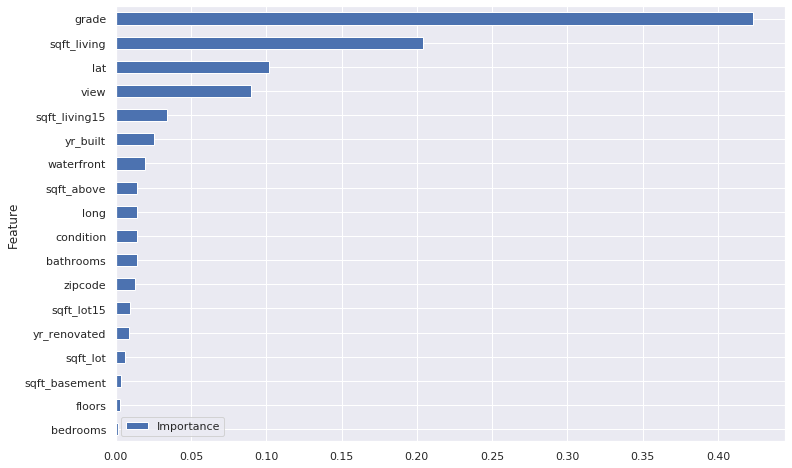

In [93]:
df_imp.sort_values('Importance').set_index('Feature').sort_values('Importance').plot.barh(figsize=(12,8))

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


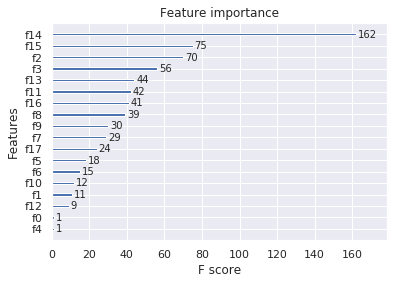

In [86]:
axsub = xgb.plot_importance(model_xgb)
print(features_raw_all)
print(dict_features)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


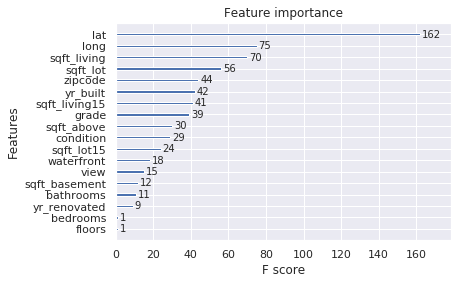

In [88]:
axsub = xgb.plot_importance(model_xgb)

Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(features_raw_all))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()

In [89]:
show_method_attributes(model_xgb)

Object Type: <class 'xgboost.sklearn.XGBRegressor'>



,0,1,2,3,4,5,6
0,apply,colsample_bytree,get_num_boosting_rounds,learning_rate,n_estimators,reg_alpha,seed
1,base_score,evals_result,get_params,load_model,n_jobs,reg_lambda,set_params
2,booster,feature_importances_,get_xgb_params,max_delta_step,nthread,save_model,silent
3,coef_,fit,importance_type,max_depth,objective,scale_pos_weight,subsample
4,colsample_bylevel,gamma,intercept_,min_child_weight,predict,score,verbosity
5,colsample_bynode,get_booster,kwargs,missing,random_state,,


In [90]:
model_xgb.feature_importances_

array([0.00126452, 0.01385575, 0.20397831, 0.0062897 , 0.00313387,
       0.01920414, 0.08982094, 0.01391194, 0.42353657, 0.014353  ,
       0.00344811, 0.02555324, 0.00878975, 0.01294596, 0.1021134 ,
       0.01393693, 0.03407998, 0.00978385], dtype=float32)

# Xgboost using DMatrix

In [113]:
dtrain = xgb.DMatrix(Xtrain_scaled,ytrain,feature_names=features_raw_all)


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,11.303995,0.001941,11.303974,0.008381
1,10.175575,0.001721,10.175561,0.008435
2,9.160021,0.001472,9.160079,0.008393
3,8.246159,0.001456,8.246203,0.008203
4,7.423819,0.001380,7.423824,0.007907


In [0]:

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}


## Cross Validation

In [0]:

cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=5,
    num_boost_round=500,early_stopping_rounds=50,metrics="rmse",
     as_pandas=True, seed=RANDOM_STATE)

cv_results.head()

## Modelling xgboost using dtrain

In [118]:
dtrain = xgb.DMatrix(Xtrain_scaled,ytrain,feature_names=features_raw_all)
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}

# train the model
model_xgb = xgb.train(dtrain=dtrain,params=params,num_boost_round=1000)

# test the model
dtest = xgb.DMatrix(Xtest_scaled, ytest, feature_names=features_raw_all)
ypreds = model_xgb.predict(dtest)

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytest,ypreds))
print(f'Test RMSE: {rmse}')

# explained variance score
evs = explained_variance_score(ypreds, ytest)
print('Explained Variance Score: ', evs)

# r-squared values
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtest_scaled.shape[0], Xtest_scaled.shape[1])
print('r_squared: ', r2)
print('adjustedr2: ', ar2)

Test RMSE: 0.161218645932789
r_squared:  0.9072893708580465
adjustedr2:  0.9069232661668936
Explained Variance Score:  0.8942810631636265


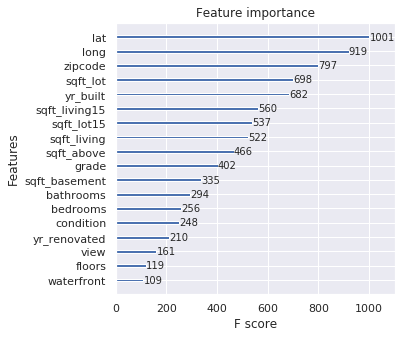

In [119]:
xgb.plot_importance(model_xgb)

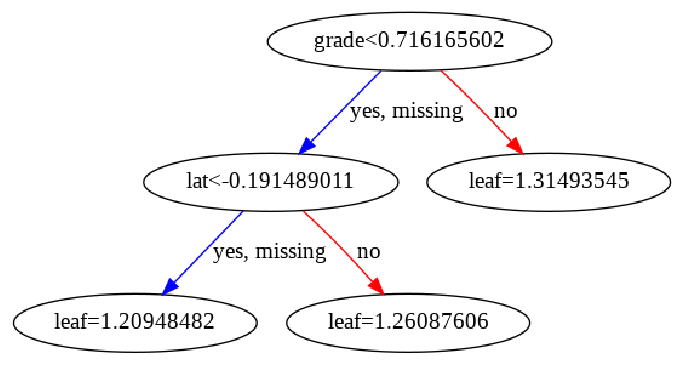

In [120]:
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_tree(model_xgb,ax=ax)

# HPO (Hyper Parameter Optimization)

Parameters:
- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.

Regularization parameters:

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [0]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# params_grid = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
# }

                    
# model_xgb = xgb.XGBRegressor(learning_rate =0.1,
#                                  n_estimators=1000,
#                                  max_depth=5,
#                                  min_child_weight=1,
#                                  gamma=0,
#                                  subsample=0.8,
#                                  colsample_bytree=0.8,
#                                  n_jobs=-1,
#                                  scale_pos_weight=1,
#                                  seed=RANDOM_STATE)

# gsearch1 = GridSearchCV(estimator=model_xgb,
#                         param_grid=params_grid, 
#                         n_jobs=-1,
#                         iid=False, 
#                         verbose=10,
#                         scoring='neg_mean_squared_error')

# gsearch1.fit(Xtrain_scaled,ytrain)
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)